In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.animation as animation
import glob
from matplotlib.animation import PillowWriter
import bilinear_mesh
import matplotlib.colors as mcolors

# MAIN CONFIGURATION

In [8]:
## SETUP CONFIG 

nx=1024
ny=1024

output_name= 'sim_16hill_3q_copy' #'test_'+str(nx)+'_'+str(ny) 
fluid = 'dust'
data_name = fluid+'dens'
output_number='400'


## MESH CONFIG

archivo_x = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+ output_name +'/domain_x.dat'
archivo_y = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+ output_name +'/domain_y.dat'

x = np.loadtxt(archivo_x)
y = np.loadtxt(archivo_y)

xmed = 0.5*(x[1:]+x[:-1])#phi
ymed = 0.5*(y[1:]+y[:-1])[3:-3] #r

X_MESH,Y_MESH = np.meshgrid(xmed,ymed)


## DATA LOAD

#gas
archivo_gas0 = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/gasdens0.dat'
archivo_gas = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/gasdens'+output_number+'.dat'

gas0 = np.fromfile(archivo_gas0).reshape(ny,nx)
gas = np.fromfile(archivo_gas).reshape(ny,nx)

#dust
archivo_dust0 = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/dustdens0.dat'
archivo_dust = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/dustdens'+output_number+'.dat'

dust0 = np.fromfile(archivo_dust0).reshape(ny,nx)
dust = np.fromfile(archivo_dust).reshape(ny,nx)

# DENSIDAD

INDIVIDUAL

/tmp/ipykernel_1350995/3885370949.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm1 = axs[0,0].pcolormesh(Y_MESH*np.cos(X_MESH),
/tmp/ipykernel_1350995/3885370949.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm2 = axs[0,1].pcolormesh(Y_MESH*np.cos(X_MESH),
/tmp/ipykernel_1350995/3885370949.py:30: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm3 = axs[1,0].pcolor

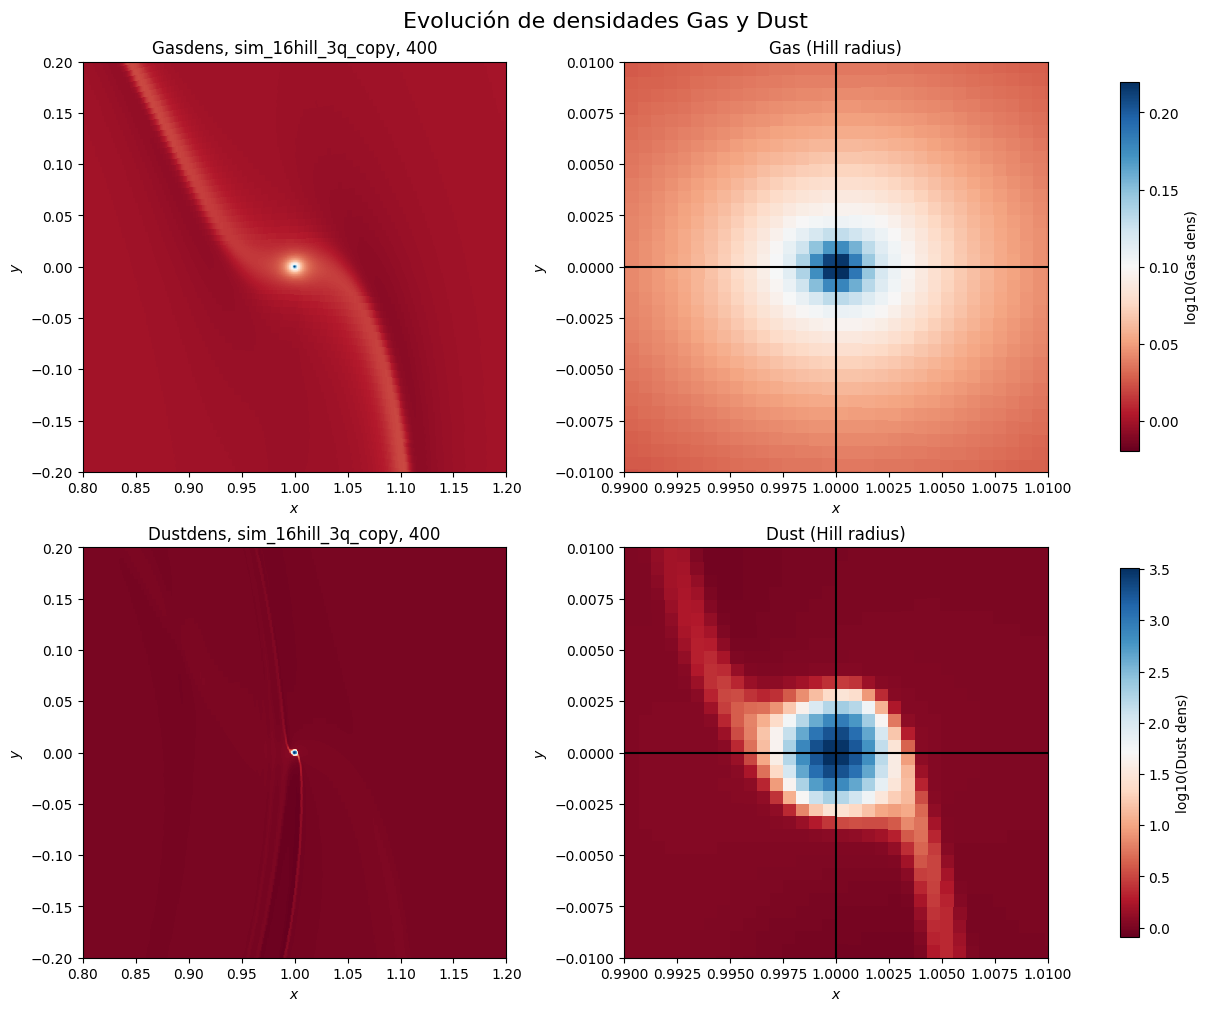

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# --- GAS ---
pcm1 = axs[0,0].pcolormesh(Y_MESH*np.cos(X_MESH),
                           Y_MESH*np.sin(X_MESH),
                           np.log10(gas/gas0),
                           cmap='RdBu')
axs[0,0].set_xlim(1.0-0.2, 1+0.2)
axs[0,0].set_ylim(-0.2, 0.2)
axs[0,0].set_xlabel(r'$x$')
axs[0,0].set_ylabel(r'$y$')
axs[0,0].set_title(f'Gasdens, {output_name}, {output_number}')


pcm2 = axs[0,1].pcolormesh(Y_MESH*np.cos(X_MESH),
                           Y_MESH*np.sin(X_MESH),
                           np.log10(gas/gas0),
                           cmap='RdBu')
axs[0,1].set_xlim(1.0-0.01, 1+0.01)
axs[0,1].set_ylim(-0.01, 0.01)
axs[0,1].set_xlabel(r'$x$')
axs[0,1].set_ylabel(r'$y$')
axs[0,1].set_title('Gas (Hill radius)')
axs[0,1].axvline(x=1.0, color='black')
axs[0,1].axhline(y=0.0, color='black')



# --- DUST ---
pcm3 = axs[1,0].pcolormesh(Y_MESH*np.cos(X_MESH),
                           Y_MESH*np.sin(X_MESH),
                           np.log10(dust/dust0),
                           cmap='RdBu')
axs[1,0].set_xlim(1.0-0.2, 1+0.2)
axs[1,0].set_ylim(-0.2, 0.2)
axs[1,0].set_xlabel(r'$x$')
axs[1,0].set_ylabel(r'$y$')
axs[1,0].set_title(f'Dustdens, {output_name}, {output_number}')


pcm4 = axs[1,1].pcolormesh(Y_MESH*np.cos(X_MESH),
                           Y_MESH*np.sin(X_MESH),
                           np.log10(dust/dust0),
                           cmap='RdBu')
axs[1,1].set_xlim(1.0-0.01, 1+0.01)
axs[1,1].set_ylim(-0.01, 0.01)
axs[1,1].set_xlabel(r'$x$')
axs[1,1].set_ylabel(r'$y$')
axs[1,1].set_title('Dust (Hill radius)')
axs[1,1].axvline(x=1.0, color='black')
axs[1,1].axhline(y=0.0, color='black')

# --- Colorbars separadas ---
cbar_gas = fig.colorbar(pcm1, ax=axs[0,:], orientation='vertical', shrink=0.9)
cbar_gas.set_label('log10(Gas dens)')

cbar_dust = fig.colorbar(pcm3, ax=axs[1,:], orientation='vertical', shrink=0.9)
cbar_dust.set_label('log10(Dust dens)')

# --- Título general ---
fig.suptitle('Evolución de densidades Gas y Dust', fontsize=16)

plt.show()


ANIMATION

/tmp/ipykernel_1350995/3031661757.py:40: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh_gas1 = axs[0,0].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
/tmp/ipykernel_1350995/3031661757.py:49: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh_gas2 = axs[0,1].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
/tmp/ipykernel_1350995/3031661757.py:58: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply ex

/home/fangulo/plots/anim_sim_16hill_3q_copy_gas_dust.gif


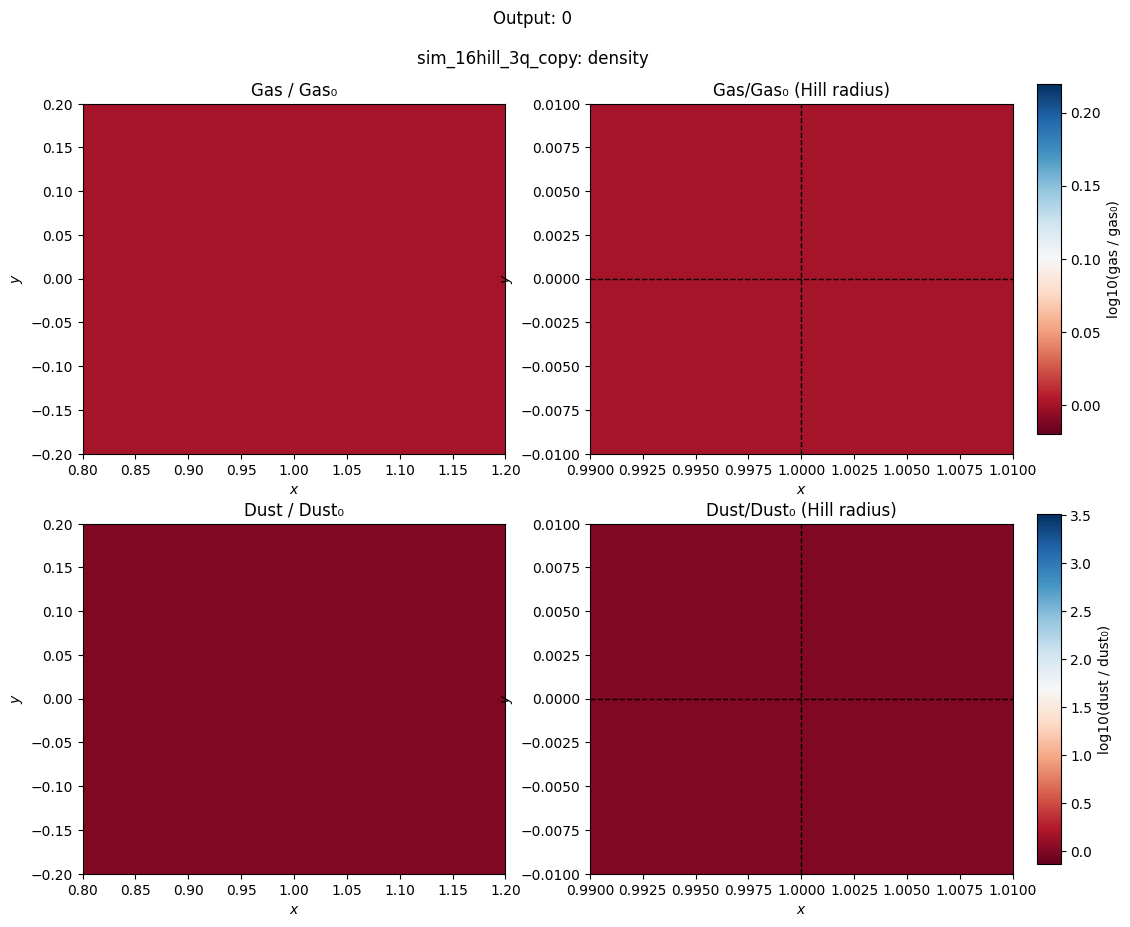

In [6]:
# --- Archivos ---
archivos_gas = []
archivos_dust = []
for i in range(int(output_number)+1):
    archivos_gas.append(f"/home/fangulo/myforkfargo3d/fargo3d/outputs/{output_name}/gasdens{i}.dat")
    archivos_dust.append(f"/home/fangulo/myforkfargo3d/fargo3d/outputs/{output_name}/dustdens{i}.dat")

# --- Figura con 2x2 subplots ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# --- Datos iniciales (para normalizar) ---
data_gas0 = np.fromfile(archivos_gas[0]).reshape(ny, nx)
data_dust0 = np.fromfile(archivos_dust[0]).reshape(ny, nx)

# --- Calcular rango global (vmin/vmax) ---
vmin_gas, vmax_gas = np.inf, -np.inf
vmin_dust, vmax_dust = np.inf, -np.inf

for i in range(int(output_number)+1):
    data_gas = np.fromfile(archivos_gas[i]).reshape(ny, nx)
    data_dust = np.fromfile(archivos_dust[i]).reshape(ny, nx)

    ratio_gas = data_gas / data_gas0
    ratio_dust = data_dust / data_dust0

    log_gas = np.log10(ratio_gas)
    log_dust = np.log10(ratio_dust)

    vmin_gas = min(vmin_gas, log_gas.min())
    vmax_gas = max(vmax_gas, log_gas.max())
    vmin_dust = min(vmin_dust, log_dust.min())
    vmax_dust = max(vmax_dust, log_dust.max())

# --- OPCIÓN: escala simétrica alrededor de 0 ---
# vmax = max(abs(vmin_gas), abs(vmax_gas), abs(vmin_dust), abs(vmax_dust))
# vmin_gas = vmin_dust = -vmax
# vmax_gas = vmax_dust = vmax

# --- Inicializar las mallas (todo = 0 → log10(1)) ---
mesh_gas1 = axs[0,0].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
                                np.zeros_like(data_gas0), cmap='RdBu',
                                vmin=vmin_gas, vmax=vmax_gas)
axs[0,0].set_xlim(1.0-0.2, 1+0.2)
axs[0,0].set_ylim(-0.2, 0.2)
axs[0,0].set_xlabel(r'$x$')
axs[0,0].set_ylabel(r'$y$')
axs[0,0].set_title('Gas / Gas₀')

mesh_gas2 = axs[0,1].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
                                np.zeros_like(data_gas0), cmap='RdBu',
                                vmin=vmin_gas, vmax=vmax_gas)
axs[0,1].set_xlim(1.0-0.01, 1+0.01)
axs[0,1].set_ylim(-0.01, 0.01)
axs[0,1].set_xlabel(r'$x$')
axs[0,1].set_ylabel(r'$y$')
axs[0,1].set_title('Gas/Gas₀ (Hill radius)')

mesh_dust1 = axs[1,0].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
                                 np.zeros_like(data_dust0), cmap='RdBu',
                                 vmin=vmin_dust, vmax=vmax_dust)
axs[1,0].set_xlim(1.0-0.2, 1+0.2)
axs[1,0].set_ylim(-0.2, 0.2)
axs[1,0].set_xlabel(r'$x$')
axs[1,0].set_ylabel(r'$y$')
axs[1,0].set_title('Dust / Dust₀')

mesh_dust2 = axs[1,1].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
                                 np.zeros_like(data_dust0), cmap='RdBu',
                                 vmin=vmin_dust, vmax=vmax_dust)
axs[1,1].set_xlim(1.0-0.01, 1+0.01)
axs[1,1].set_ylim(-0.01, 0.01)
axs[1,1].set_xlabel(r'$x$')
axs[1,1].set_ylabel(r'$y$')
axs[1,1].set_title('Dust/Dust₀ (Hill radius)')

# --- Dibujar líneas en los paneles de zoom ---
for ax in [axs[0,1], axs[1,1]]:
    ax.axvline(x=1.0, color='black', linestyle='--', linewidth=1)
    ax.axhline(y=0.0, color='black', linestyle='--', linewidth=1)

# --- Colorbars ---
fig.subplots_adjust(right=0.90)

cbar_ax_gas = fig.add_axes([0.92, 0.55, 0.02, 0.35])
cbar_gas = fig.colorbar(mesh_gas1, cax=cbar_ax_gas)
cbar_gas.set_label('log10(gas / gas₀)')

cbar_ax_dust = fig.add_axes([0.92, 0.12, 0.02, 0.35])
cbar_dust = fig.colorbar(mesh_dust1, cax=cbar_ax_dust)
cbar_dust.set_label('log10(dust / dust₀)')

# --- Textos dinámicos ---
texto_tiempo = fig.text(0.5, 0.96, '', ha='center', fontsize=12)
texto_data = fig.text(0.5, 0.92, output_name+': density', ha='center', fontsize=12)

# --- Función de actualización ---
def actualizar(frame):
    # Cargar datos gas y polvo
    data_gas = np.fromfile(archivos_gas[frame]).reshape(ny, nx)
    data_dust = np.fromfile(archivos_dust[frame]).reshape(ny, nx)

    # Cociente con data inicial
    ratio_gas = data_gas / data_gas0
    ratio_dust = data_dust / data_dust0

    # Log10 del cociente
    log_gas = np.log10(ratio_gas)
    log_dust = np.log10(ratio_dust)

    # Actualizar las 4 mallas
    mesh_gas1.set_array(log_gas.ravel())
    mesh_gas2.set_array(log_gas.ravel())
    mesh_dust1.set_array(log_dust.ravel())
    mesh_dust2.set_array(log_dust.ravel())

    texto_tiempo.set_text(f'Output: {frame}')
    return mesh_gas1, mesh_gas2, mesh_dust1, mesh_dust2, texto_tiempo

# --- Animación ---
ani = animation.FuncAnimation(fig, actualizar, frames=range(int(output_number)+1),
                              interval=200, blit=False)
writer = PillowWriter(fps=5, metadata={'loop': 0})

ani.save(f'/home/fangulo/plots/anim_{output_name}_gas_dust.gif', writer=writer)
print(f'/home/fangulo/plots/anim_{output_name}_gas_dust.gif')


# MONITOR

In [9]:
## GAS
gas_mass = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/monitor/gas/mass.dat'

time_gas_list = []
mass_gas_list = []

with open(gas_mass, "r") as archivo:
    for linea in archivo:
        time_i, mass_i = linea.strip().split('\t')
        time_gas_list.append(float(time_i))
        mass_gas_list.append(float(mass_i))

time_gas = np.array(time_gas_list)[:int(output_number)]
mass_gas = np.array(mass_gas_list)[:int(output_number)]

gas_flux = np.zeros_like(mass_gas)

gas_flux = (mass_gas[1:]-mass_gas[:-1])/(time_gas[1:]-time_gas[:-1])

## DUST
dust_mass = '/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/monitor/dust/mass.dat'

time_dust_list = []
mass_dust_list = []

with open(dust_mass, "r") as archivo:
    for linea in archivo:
        time_i, mass_i = linea.strip().split('\t')
        time_dust_list.append(float(time_i))
        mass_dust_list.append(float(mass_i))

time_dust = np.array(time_dust_list)[:int(output_number)]
mass_dust = np.array(mass_dust_list)[:int(output_number)]

dust_flux = np.zeros_like(mass_dust)

dust_flux = (mass_dust[1:]-mass_dust[:-1])/(time_dust[1:]-time_dust[:-1])

print(f'Gas time = [{time_gas[0]} - {time_gas[-1]}], len = {len(time_gas)}')
print(f'Dust time = [{time_dust[0]} - {time_dust[-1]}], len = {len(time_dust)}')
print('---------')
print(f'Gas flux len = {len(gas_flux)}')
print(f'Dust flux len = {len(dust_flux)}')

Gas time = [6.28318530718 - 2513.27412287], len = 400
Dust time = [6.28318530718 - 2513.27412287], len = 400
---------
Gas flux len = 399
Dust flux len = 399


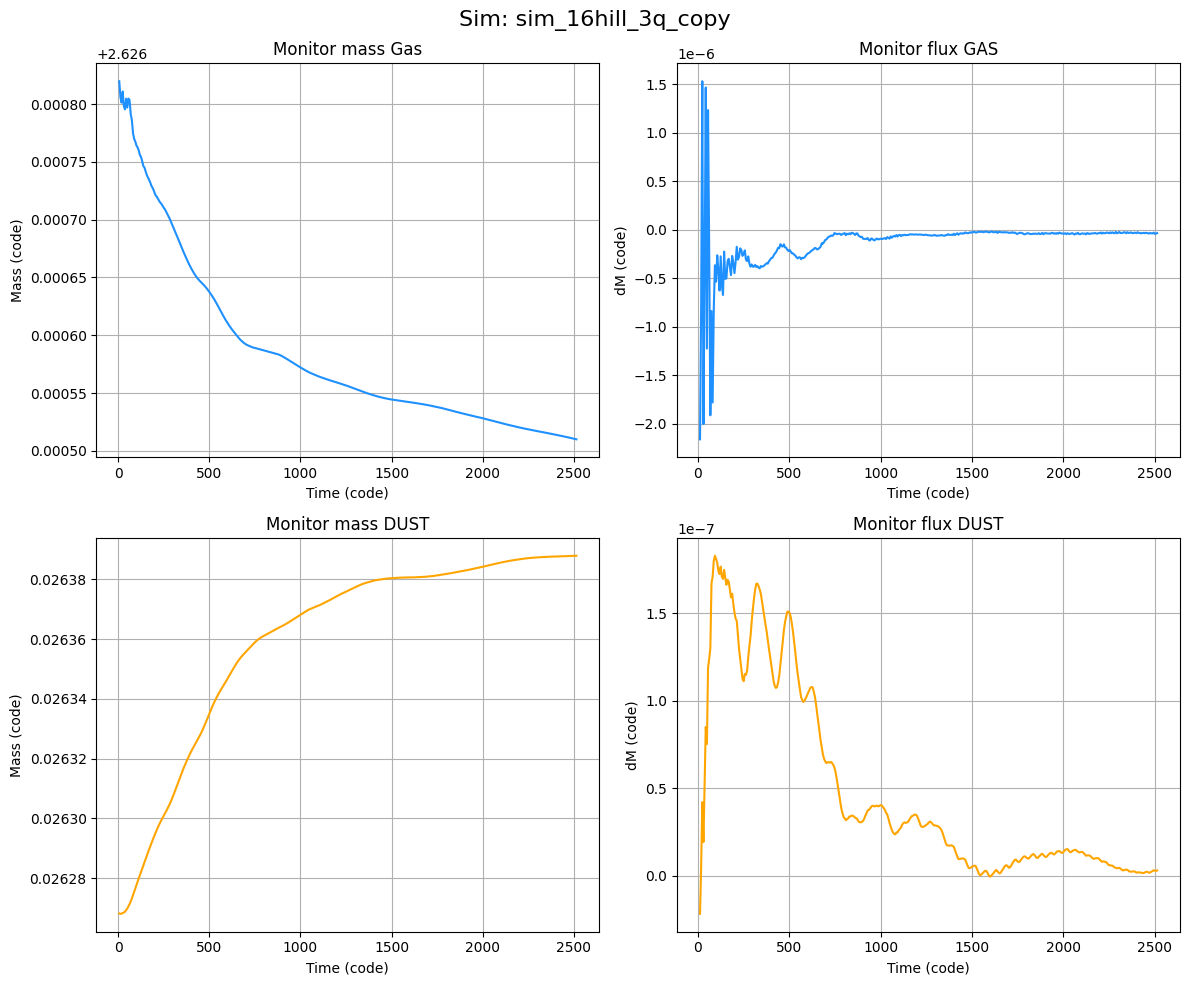

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Sim: '+output_name, fontsize=16)

# --- Primer subplot (arriba izquierda) ---
ax[0,0].plot(time_gas, mass_gas, color='dodgerblue')
ax[0,0].set_title('Monitor mass Gas')
ax[0,0].set_xlabel('Time (code)')
ax[0,0].set_ylabel('Mass (code)')
ax[0,0].grid(True)

# --- Segundo subplot (arriba derecha) ---
ax[0,1].plot(time_gas[1:], gas_flux, color='dodgerblue')
ax[0,1].set_title('Monitor flux GAS')
#ax[0,1].set_yscale('symlog')
ax[0,1].set_xlabel('Time (code)')
ax[0,1].set_ylabel('dM (code)')
ax[0,1].grid(True)

# --- Tercer subplot (abajo izquierda) ---
ax[1,0].plot(time_dust, mass_dust, color='orange')
ax[1,0].set_title('Monitor mass DUST')
ax[1,0].set_xlabel('Time (code)')
ax[1,0].set_ylabel('Mass (code)')
ax[1,0].grid(True)

# --- Cuarto subplot (abajo derecha) ---
ax[1,1].plot(time_dust[1:], dust_flux, color='orange')
#ax[1,1].set_yscale('symlog')
ax[1,1].set_title('Monitor flux DUST')
ax[1,1].set_xlabel('Time (code)')
ax[1,1].set_ylabel('dM (code)')
ax[1,1].grid(True)

# --- Ajustar espacios ---
fig.tight_layout()  # evita que los títulos y ejes se encimen

# --- Mostrar figura ---
plt.show()


# MASS FLUX

SOLO 1 INTERPOLACION

In [66]:
rhill = 0.01

GAS

In [67]:
interp_flux_gas_list = []
rhill = 0.01

for n in range(2,int(output_number)+1):
    #interpolate density field
    dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/gasdens'+str(n)+'.dat').reshape(ny,nx)
     
    #velocity relative to the planet
    vphi = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'gasvx'+str(n)+'.dat').reshape(ny,nx)
    vr = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'gasvy'+str(n)+'.dat').reshape(ny,nx)

    x_dp = Y_MESH*np.cos(X_MESH)-1
    y_dp = Y_MESH*np.sin(X_MESH) #cartesian coords, now the center is at (1,0) (the planet)
    v_xp = vr*np.cos(X_MESH) - vphi*np.sin(X_MESH) #v_xs = v_xp, x velocity relative to the planet
    v_yp = vr*np.sin(X_MESH) + vphi*np.cos(X_MESH) #v_ys = v_yp, y velocity relative to the planet

    r_dp = np.sqrt((x_dp)**2+(y_dp)**2) #new radio from planet to dust
    phi_dp = np.arctan2(y_dp,x_dp) #new angular position, to the planet to dust

    vr_p = v_xp*np.cos(phi_dp) + v_yp*np.sin(phi_dp) #radial velocity relative to the planet
    vphi_p = -v_xp*np.sin(phi_dp) + v_yp*np.cos(phi_dp) #angular velocity relative to the planet

    mass_flux_global = dens * vr_p * r_dp

    mass_flux_interp, extent, new_p, new_r = bilinear_mesh.get_polar(0., 1.1*(0.01), 0, 2*np.pi, ymed, xmed , mass_flux_global, 32,32)
    
    dp = np.empty(len(new_p))
    dp[:-1] = new_p[1:] - new_p[:-1]
    dp[-1]  = 2*np.pi - (new_p[-1] - new_p[0])

    #calulate the index of the hill radius
    closest = [1]

    for i in new_r:
        diff = np.abs(i-rhill)
        if diff<np.abs(closest[-1]-rhill):
            closest.append(i)
        else:
            continue

    hill_index = int((np.where(new_r==closest[-1]))[0][0])
    
    flux_list_i = []
    for j in range(0,32):
        mass_flux_final = mass_flux_interp[hill_index,j] * dp[j]
        flux_list_i.append(mass_flux_final)

    interp_flux_gas_list.append(np.sum(flux_list_i))

gas_interp_flux = np.array(interp_flux_gas_list)    

DUST

In [68]:
interp_flux_dust_list = []

for n in range(2,int(output_number)+1):
    #interpolate density field
    dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/dustdens'+str(n)+'.dat').reshape(ny,nx)
    
    #velocity relative to the planet
    vphi = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'dustvx'+str(n)+'.dat').reshape(ny,nx)
    vr = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'dustvy'+str(n)+'.dat').reshape(ny,nx)

    x_dp = Y_MESH*np.cos(X_MESH)-1
    y_dp = Y_MESH*np.sin(X_MESH) #cartesian coords, now the center is at (1,0) (the planet)
    v_xp = vr*np.cos(X_MESH) - vphi*np.sin(X_MESH) #v_xs = v_xp, x velocity relative to the planet
    v_yp = vr*np.sin(X_MESH) + vphi*np.cos(X_MESH) #v_ys = v_yp, y velocity relative to the planet

    r_dp = np.sqrt((x_dp)**2+(y_dp)**2) #new radio from planet to dust
    phi_dp = np.arctan2(y_dp,x_dp) #new angular position, to the planet to dust

    vr_p = v_xp*np.cos(phi_dp) + v_yp*np.sin(phi_dp) #radial velocity relative to the planet
    vphi_p = -v_xp*np.sin(phi_dp) + v_yp*np.cos(phi_dp) #angular velocity relative to the planet
    
    mass_flux_global = dens * vr_p * r_dp

    mass_flux_interp, extent, new_p, new_r = bilinear_mesh.get_polar(0., 1.1*(0.01), 0, 2*np.pi, ymed, xmed , mass_flux_global, 32,32)

    dp = np.empty(len(new_p))
    dp[:-1] = new_p[1:] - new_p[:-1]
    dp[-1]  = 2*np.pi - (new_p[-1] - new_p[0])

    #calulate the index of the hill radius
    closest = [1]

    for i in new_r:
        diff = np.abs(i-rhill)
        if diff<np.abs(closest[-1]-rhill):
            closest.append(i)
        else:
            continue

    hill_index = int((np.where(new_r==closest[-1]))[0][0])
    
    flux_list_i = []
    for j in range(0,32):
        mass_flux_final = mass_flux_interp[hill_index,j] * dp[j]
        flux_list_i.append(mass_flux_final)

    interp_flux_dust_list.append(np.sum(flux_list_i))

dust_interp_flux = np.array(interp_flux_dust_list)   

Gas difference: [-0.99999176 -0.93240271  1.02065974 -0.97785226 -0.96789101  0.99843089
 -1.03270481  0.98763236 -1.3629459  -1.04932516]
---------
Dust difference: [-7.82331905 36.90675524  5.57274134 11.20709903  4.96376001  3.41175003
  3.77083598  2.77533031  2.70855365  2.63100171]


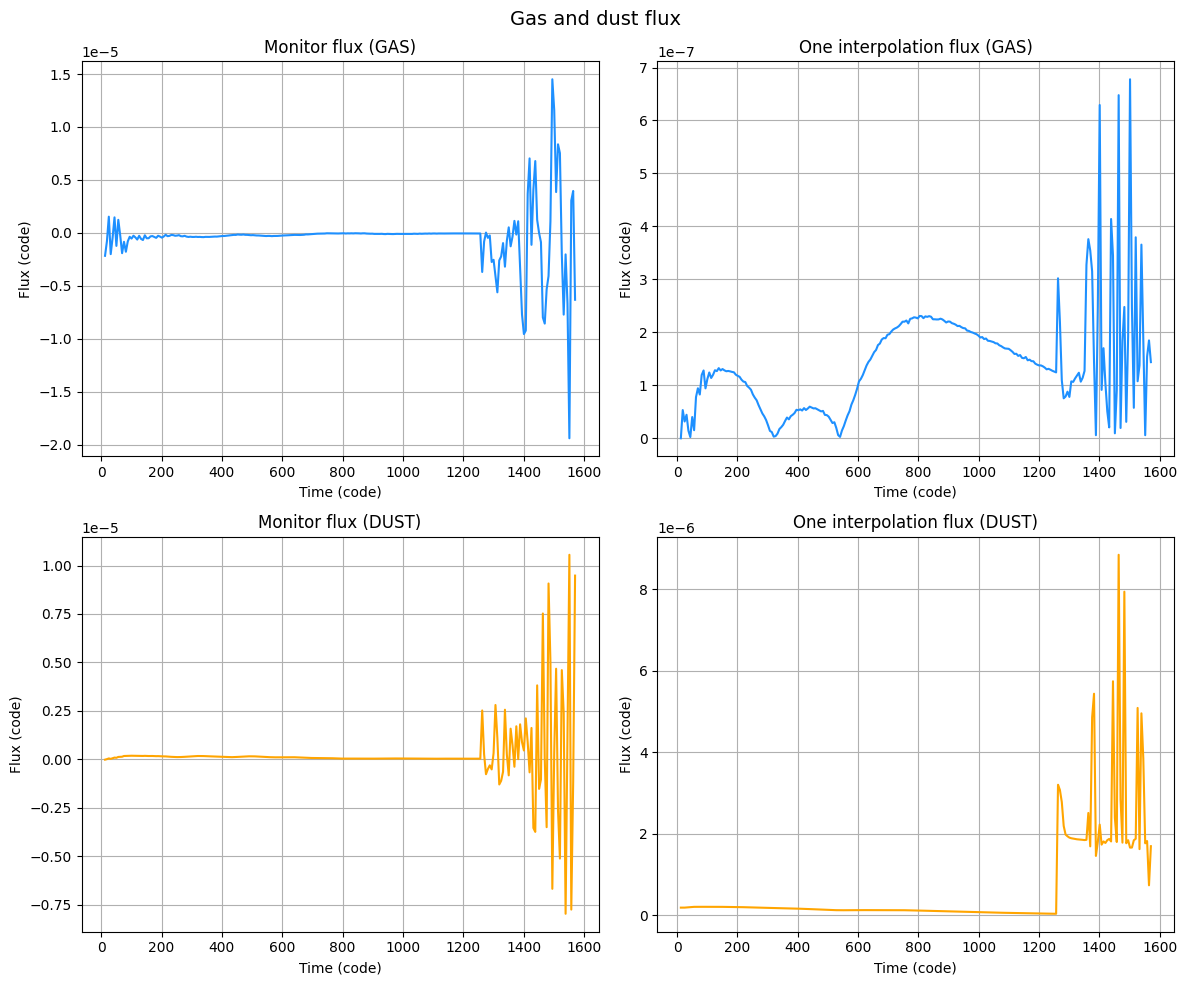

In [69]:
print('Gas difference: '+str((np.abs(gas_flux - gas_interp_flux)/gas_flux)[:10])) 
print('---------')
print('Dust difference: '+str((np.abs(dust_flux - dust_interp_flux)/dust_flux)[:10])) 


fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Gas and dust flux', fontsize=14)

# --- Primer subplot (arriba izquierda) ---
ax[0,0].plot(time_gas[1:], gas_flux, color='dodgerblue')
#ax[0,0].set_ylim(-7.5*10**(-7),2.5*10**(-7))
ax[0,0].set_title('Monitor flux (GAS)')
ax[0,0].set_xlabel('Time (code)')
ax[0,0].set_ylabel('Flux (code)')
#ax[0,0].set_yscale('symlog')
ax[0,0].grid(True)

# --- Segundo subplot (arriba derecha) ---
ax[0,1].plot(time_gas[1:], np.abs(gas_interp_flux), color='dodgerblue')
ax[0,1].set_title('One interpolation flux (GAS)')
ax[0,1].set_xlabel('Time (code)')
ax[0,1].set_ylabel('Flux (code)')
#ax[0,1].set_yscale('symlog')
ax[0,1].grid(True)

# --- Tercer subplot (abajo izquierda) ---
ax[1,0].plot(time_dust[1:], dust_flux, color='orange')
ax[1,0].set_title('Monitor flux (DUST)')
ax[1,0].set_xlabel('Time (code)')
ax[1,0].set_ylabel('Flux (code)')
ax[1,0].grid(True)

# --- Cuarto subplot (abajo derecha) ---
ax[1,1].plot(time_dust[1:], np.abs(dust_interp_flux), color='orange')
ax[1,1].set_title('One interpolation flux (DUST)')
ax[1,1].set_xlabel('Time (code)')
ax[1,1].set_ylabel('Flux (code)')
ax[1,1].grid(True)

# --- Ajustar espacios ---
fig.tight_layout()  # evita que los títulos y ejes se encimen

# --- Mostrar figura ---
plt.show()


Promedio

In [70]:
mean_flux_gas_list = []
rhill = 0.01

for n in range(2,int(output_number)+1):
    #interpolate density field
    dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/gasdens'+str(n)+'.dat').reshape(ny,nx)
     
    #velocity relative to the planet
    vphi = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'gasvx'+str(n)+'.dat').reshape(ny,nx)
    vr = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'gasvy'+str(n)+'.dat').reshape(ny,nx)

    x_dp = Y_MESH*np.cos(X_MESH)-1
    y_dp = Y_MESH*np.sin(X_MESH) #cartesian coords, now the center is at (1,0) (the planet)
    v_xp = vr*np.cos(X_MESH) - vphi*np.sin(X_MESH) #v_xs = v_xp, x velocity relative to the planet
    v_yp = vr*np.sin(X_MESH) + vphi*np.cos(X_MESH) #v_ys = v_yp, y velocity relative to the planet

    r_dp = np.sqrt((x_dp)**2+(y_dp)**2) #new radio from planet to dust
    phi_dp = np.arctan2(y_dp,x_dp) #new angular position, to the planet to dust

    vr_p = v_xp*np.cos(phi_dp) + v_yp*np.sin(phi_dp) #radial velocity relative to the planet
    vphi_p = -v_xp*np.sin(phi_dp) + v_yp*np.cos(phi_dp) #angular velocity relative to the planet

    mass_flux_global = dens * vr_p * r_dp

    mass_flux_interp, extent, new_p, new_r = bilinear_mesh.get_polar(0., 1.1*(0.01), 0, 2*np.pi, ymed, xmed , mass_flux_global, 32,32)
    
    dp = np.empty(len(new_p))
    dp[:-1] = new_p[1:] - new_p[:-1]
    dp[-1]  = 2*np.pi - (new_p[-1] - new_p[0])

    #calulate the index of the hill radius
    closest = [1]

    for i in new_r:
        diff = np.abs(i-rhill)
        if diff<np.abs(closest[-1]-rhill):
            closest.append(i)
        else:
            continue

    hill_index = int((np.where(new_r==closest[-1]))[0][0])
    
    flux_list_i = []
    for j in range(0,32):
        mass_flux_top3 = mass_flux_interp[hill_index+3,j] * dp[j]
        mass_flux_top2 = mass_flux_interp[hill_index+2,j] * dp[j]
        mass_flux_top1 = mass_flux_interp[hill_index+1,j] * dp[j]
        mass_flux_bot3 = mass_flux_interp[hill_index-3,j] * dp[j]
        mass_flux_bot2 = mass_flux_interp[hill_index-2,j] * dp[j]
        mass_flux_bot1 = mass_flux_interp[hill_index-1,j] * dp[j]
        mass_flux_mean = (mass_flux_top3+mass_flux_top2+mass_flux_top1 + mass_flux_bot1+mass_flux_bot2+mass_flux_bot3)/6
        flux_list_i.append(mass_flux_mean)

    mean_flux_gas_list.append(np.sum(flux_list_i))

gas_mean_flux = np.array(mean_flux_gas_list)    

In [71]:
mean_flux_dust_list = []

for n in range(2,int(output_number)+1):
    #interpolate density field
    dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/dustdens'+str(n)+'.dat').reshape(ny,nx)
    
    #velocity relative to the planet
    vphi = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'dustvx'+str(n)+'.dat').reshape(ny,nx)
    vr = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'dustvy'+str(n)+'.dat').reshape(ny,nx)

    x_dp = Y_MESH*np.cos(X_MESH)-1
    y_dp = Y_MESH*np.sin(X_MESH) #cartesian coords, now the center is at (1,0) (the planet)
    v_xp = vr*np.cos(X_MESH) - vphi*np.sin(X_MESH) #v_xs = v_xp, x velocity relative to the planet
    v_yp = vr*np.sin(X_MESH) + vphi*np.cos(X_MESH) #v_ys = v_yp, y velocity relative to the planet

    r_dp = np.sqrt((x_dp)**2+(y_dp)**2) #new radio from planet to dust
    phi_dp = np.arctan2(y_dp,x_dp) #new angular position, to the planet to dust

    vr_p = v_xp*np.cos(phi_dp) + v_yp*np.sin(phi_dp) #radial velocity relative to the planet
    vphi_p = -v_xp*np.sin(phi_dp) + v_yp*np.cos(phi_dp) #angular velocity relative to the planet
    
    mass_flux_global = dens * vr_p * r_dp

    mass_flux_interp, extent, new_p, new_r = bilinear_mesh.get_polar(0., 1.1*(0.01), 0, 2*np.pi, ymed, xmed , mass_flux_global, 32,32)

    dp = np.empty(len(new_p))
    dp[:-1] = new_p[1:] - new_p[:-1]
    dp[-1]  = 2*np.pi - (new_p[-1] - new_p[0])

    #calulate the index of the hill radius
    closest = [1]

    for i in new_r:
        diff = np.abs(i-rhill)
        if diff<np.abs(closest[-1]-rhill):
            closest.append(i)
        else:
            continue

    hill_index = int((np.where(new_r==closest[-1]))[0][0])
    
    flux_list_i = []
    for j in range(0,32):
        mass_flux_top3 = mass_flux_interp[hill_index+3,j] * dp[j]
        mass_flux_top2 = mass_flux_interp[hill_index+2,j] * dp[j]
        mass_flux_top1 = mass_flux_interp[hill_index+1,j] * dp[j]
        mass_flux_bot3 = mass_flux_interp[hill_index-3,j] * dp[j]
        mass_flux_bot2 = mass_flux_interp[hill_index-2,j] * dp[j]
        mass_flux_bot1 = mass_flux_interp[hill_index-1,j] * dp[j]
        mass_flux_mean = (mass_flux_top3+mass_flux_top2+mass_flux_top1 + mass_flux_bot1+mass_flux_bot2+mass_flux_bot3)/6
        flux_list_i.append(mass_flux_mean)

    mean_flux_dust_list.append(np.sum(flux_list_i))

dust_mean_flux = np.array(mean_flux_dust_list)   

Gas difference: [-1.01894181 -0.97850132  0.99918475 -0.99089485 -1.01202989  0.98970206
 -1.03893162  0.98430743 -1.37193946 -1.04956458]
---------
Dust difference: [-7.89894416 37.21746459  5.60017057 11.20491458  4.93821657  3.38423418
  3.72795485  2.74381399  2.67575098  2.59815948]


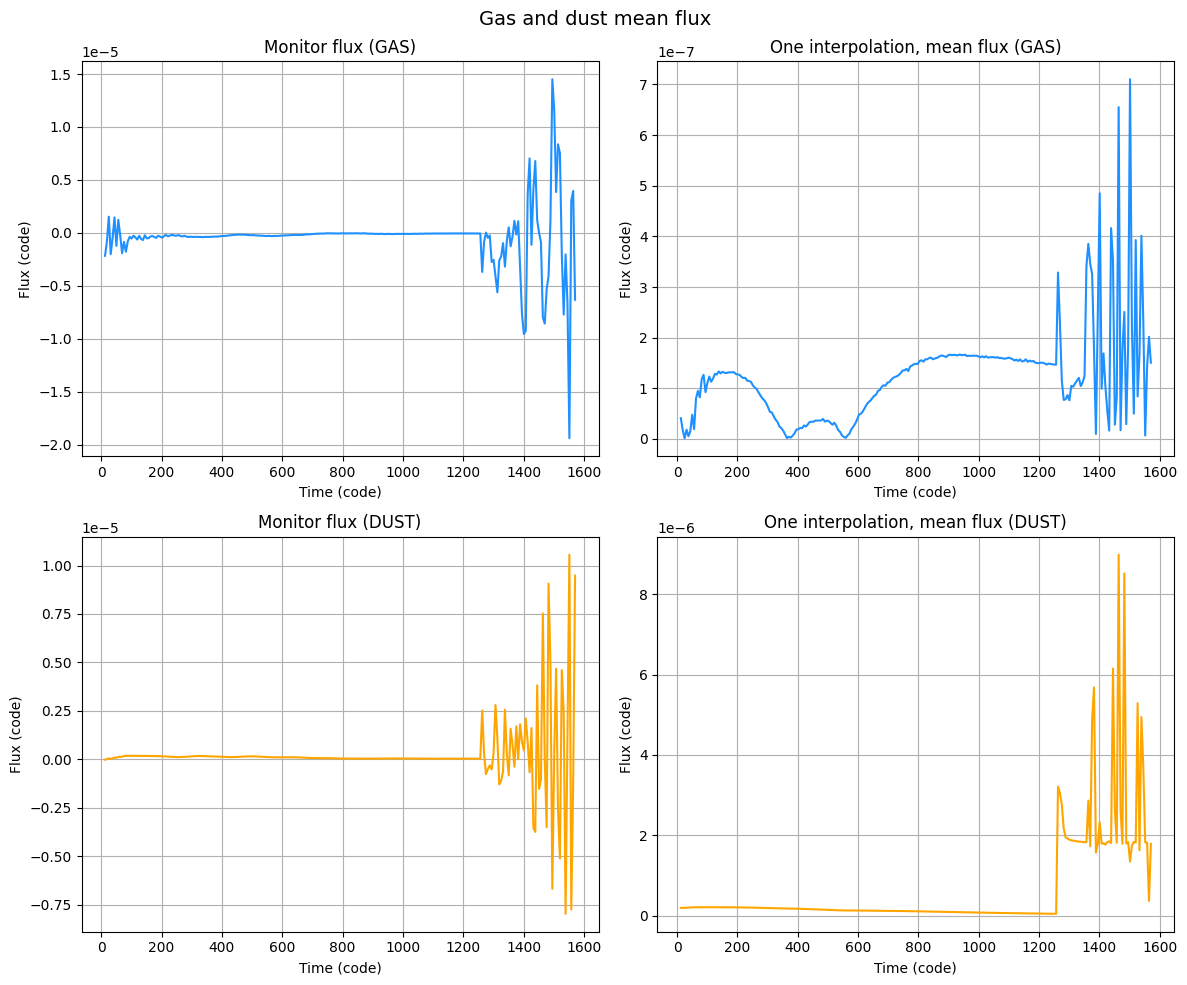

In [72]:
print('Gas difference: '+str((np.abs(gas_flux - gas_mean_flux)/gas_flux)[:10])) 
print('---------')
print('Dust difference: '+str((np.abs(dust_flux - dust_mean_flux)/dust_flux)[:10])) 

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Gas and dust mean flux', fontsize=14)

# --- Primer subplot (arriba izquierda) ---
ax[0,0].plot(time_gas[1:], gas_flux, color='dodgerblue')
#ax[0,0].set_ylim(-5*10**(-7),5*10**(-7))
ax[0,0].set_title('Monitor flux (GAS)')
ax[0,0].set_xlabel('Time (code)')
ax[0,0].set_ylabel('Flux (code)')
ax[0,0].grid(True)

# --- Segundo subplot (arriba derecha) ---
ax[0,1].plot(time_gas[1:], np.abs(gas_mean_flux), color='dodgerblue')
ax[0,1].set_title('One interpolation, mean flux (GAS)')
ax[0,1].set_xlabel('Time (code)')
ax[0,1].set_ylabel('Flux (code)')
ax[0,1].grid(True)

# --- Tercer subplot (abajo izquierda) ---
ax[1,0].plot(time_dust[1:], dust_flux, color='orange')
ax[1,0].set_title('Monitor flux (DUST)')
ax[1,0].set_xlabel('Time (code)')
ax[1,0].set_ylabel('Flux (code)')
ax[1,0].grid(True)

# --- Cuarto subplot (abajo derecha) ---
ax[1,1].plot(time_dust[1:], np.abs(dust_mean_flux), color='orange')
ax[1,1].set_title('One interpolation, mean flux (DUST)')
ax[1,1].set_xlabel('Time (code)')
ax[1,1].set_ylabel('Flux (code)')
ax[1,1].grid(True)

# --- Ajustar espacios ---
fig.tight_layout()  # evita que los títulos y ejes se encimen

# --- Mostrar figura ---
plt.show()


# MASS FLUX ANIMATION

In [11]:
rhill = 0.01

INTERPOLADO

In [12]:
interp_flux_dust_list = []

for n in range(2,int(output_number)+1):
    #interpolate density field
    dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/dustdens'+str(n)+'.dat').reshape(ny,nx)
    
    #velocity relative to the planet
    vphi = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'dustvx'+str(n)+'.dat').reshape(ny,nx)
    vr = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'dustvy'+str(n)+'.dat').reshape(ny,nx)

    x_dp = Y_MESH*np.cos(X_MESH)-1
    y_dp = Y_MESH*np.sin(X_MESH) #cartesian coords, now the center is at (1,0) (the planet)
    v_xp = vr*np.cos(X_MESH) - vphi*np.sin(X_MESH) #v_xs = v_xp, x velocity relative to the planet
    v_yp = vr*np.sin(X_MESH) + vphi*np.cos(X_MESH) #v_ys = v_yp, y velocity relative to the planet

    r_dp = np.sqrt((x_dp)**2+(y_dp)**2) #new radio from planet to dust
    phi_dp = np.arctan2(y_dp,x_dp) #new angular position, to the planet to dust

    vr_p = v_xp*np.cos(phi_dp) + v_yp*np.sin(phi_dp) #radial velocity relative to the planet
    vphi_p = -v_xp*np.sin(phi_dp) + v_yp*np.cos(phi_dp) #angular velocity relative to the planet
    
    mass_flux_global = dens * vr_p * r_dp

    mass_flux_interp, extent, new_p, new_r = bilinear_mesh.get_polar(0., 1.1*(0.01), 0, 2*np.pi, ymed, xmed , mass_flux_global, 128,128)

    mass_flux_final = mass_flux_interp 
    
    interp_flux_dust_list.append(mass_flux_final)

dust_interp_flux = np.array(interp_flux_dust_list)   

In [13]:
interp_flux_gas_list = []

for n in range(2,int(output_number)+1):
    #interpolate density field
    dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/gasdens'+str(n)+'.dat').reshape(ny,nx)
    
    #velocity relative to the planet
    vphi = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'gasvx'+str(n)+'.dat').reshape(ny,nx)
    vr = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'gasvy'+str(n)+'.dat').reshape(ny,nx)

    x_dp = Y_MESH*np.cos(X_MESH)-1
    y_dp = Y_MESH*np.sin(X_MESH) #cartesian coords, now the center is at (1,0) (the planet)
    v_xp = vr*np.cos(X_MESH) - vphi*np.sin(X_MESH) #v_xs = v_xp, x velocity relative to the planet
    v_yp = vr*np.sin(X_MESH) + vphi*np.cos(X_MESH) #v_ys = v_yp, y velocity relative to the planet

    r_dp = np.sqrt((x_dp)**2+(y_dp)**2) #new radio from planet to dust
    phi_dp = np.arctan2(y_dp,x_dp) #new angular position, to the planet to dust

    vr_p = v_xp*np.cos(phi_dp) + v_yp*np.sin(phi_dp) #radial velocity relative to the planet
    vphi_p = -v_xp*np.sin(phi_dp) + v_yp*np.cos(phi_dp) #angular velocity relative to the planet
    
    mass_flux_global = dens * vr_p * r_dp

    mass_flux_interp, extent, new_p, new_r = bilinear_mesh.get_polar(0., 1.1*(0.01), 0, 2*np.pi, ymed, xmed , mass_flux_global, 128,128)
    
    interp_flux_gas_list.append(mass_flux_interp)

gas_interp_flux = np.array(interp_flux_gas_list)   

In [14]:
closest = [1]

for i in new_r:
    diff = np.abs(i-rhill)
    if diff<np.abs(closest[-1]-rhill):
        closest.append(i)
    else:
        continue

hill_index = int((np.where(new_r==closest[-1]))[0][0])

hill_index

115

/home/fangulo/plots/anim_sim_16hill_3q_copy_interp_flux.gif


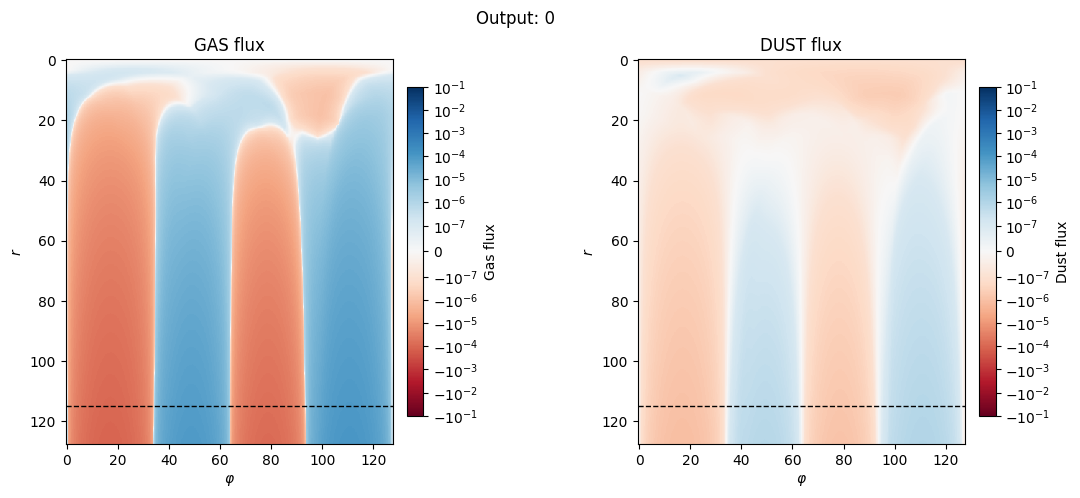

In [15]:
# --- Figura ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(wspace=0.6) 

# --- Calcular rango global para GAS ---
vmax_gas = -np.inf
for i in range(len(gas_interp_flux)):
    vmax_gas = max(np.abs(vmax_gas), np.abs(gas_interp_flux[i].max()))

vmin_gas = -vmax_gas

# --- Calcular rango global para DUST ---
vmax_dust = -np.inf
for i in range(len(dust_interp_flux)):
    vmax_dust = max(np.abs(vmax_dust), np.abs(dust_interp_flux[i].max()))

vmin_dust = -vmax_dust

# --- Inicializar mallas (frame 0) ---
norm_gas = mcolors.SymLogNorm(linthresh = 10**(-7), linscale=1.0, vmin=vmin_gas, vmax=vmax_gas, base=10) 
#linthresh: lugar donde comienza la escala logaritmica, es desde donde se le quiere dar más importancia a los datos, el valor más bajo físicamente significativo
#linscale: que tan ancha es la region lineal
mesh_flux1 = axs[0].imshow(gas_interp_flux[0], cmap='RdBu', norm=norm_gas, aspect = 'auto')
axs[0].set_title('GAS flux')
axs[0].set_xlabel(r'$\varphi$')
axs[0].set_ylabel(r'$r$')
#axs[0].set_yscale('symlog')
#axs[0].set_xscale('symlog')


norm_dust = mcolors.SymLogNorm(linthresh=10**(-7), linscale=1.0, vmin=vmin_dust, vmax=vmax_dust, base=10)
mesh_flux2 = axs[1].imshow(dust_interp_flux[0], cmap='RdBu',norm = norm_dust, aspect = 'auto')
axs[1].set_title('DUST flux')
axs[1].set_xlabel(r'$\varphi$')
axs[1].set_ylabel(r'$r$')
#axs[1].set_yscale('symlog')
#axs[1].set_xscale('symlog')

# --- Colorbars (una para cada panel) ---
cbar1 = fig.colorbar(mesh_flux1, ax=axs[0], fraction=0.046, pad=0.04)
cbar1.set_label('Gas flux')

cbar2 = fig.colorbar(mesh_flux2, ax=axs[1], fraction=0.046, pad=0.04)
cbar2.set_label('Dust flux')

# --- Texto dinámico ---
texto_tiempo = fig.text(0.5, 0.95, '', ha='center', fontsize=12)

for ax in [axs[0], axs[1]]:
    ax.axhline(y=hill_index, color='black', linestyle='--', linewidth=1)

# --- Función de actualización ---
def actualizar(frame):
    mesh_flux1.set_array(gas_interp_flux[frame])
    mesh_flux2.set_array(dust_interp_flux[frame])
    texto_tiempo.set_text(f'Output: {frame}')
    return mesh_flux1, mesh_flux2, texto_tiempo

# --- Animación ---
ani = animation.FuncAnimation(fig, actualizar, frames=range(len(dust_interp_flux)),
                              interval=200, blit=False)
writer = PillowWriter(fps=5, metadata={'loop': 0})

ani.save(f'/home/fangulo/plots/anim_{output_name}_interp_flux.gif', writer=writer)
print(f'/home/fangulo/plots/anim_{output_name}_interp_flux.gif')


usé linthresh=e-7 porque es la escala a la que me interesan los flujos, y es la escala a la que están los gráficos de flujo de arriba

NO INTERPOLADO

In [6]:
gas_flux_list = []

for n in range(2,int(output_number)+1):
    #interpolate density field
    dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/gasdens'+str(n)+'.dat').reshape(ny,nx)
     
    #velocity relative to the planet
    vphi = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'gasvx'+str(n)+'.dat').reshape(ny,nx)
    vr = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'gasvy'+str(n)+'.dat').reshape(ny,nx)

    x_dp = Y_MESH*np.cos(X_MESH)-1
    y_dp = Y_MESH*np.sin(X_MESH) #cartesian coords, now the center is at (1,0) (the planet)
    v_xp = vr*np.cos(X_MESH) - vphi*np.sin(X_MESH) #v_xs = v_xp, x velocity relative to the planet
    v_yp = vr*np.sin(X_MESH) + vphi*np.cos(X_MESH) #v_ys = v_yp, y velocity relative to the planet

    r_dp = np.sqrt((x_dp)**2+(y_dp)**2) #new radio from planet to dust
    phi_dp = np.arctan2(y_dp,x_dp) #new angular position, to the planet to dust

    vr_p = v_xp*np.cos(phi_dp) + v_yp*np.sin(phi_dp) #radial velocity relative to the planet
    vphi_p = -v_xp*np.sin(phi_dp) + v_yp*np.cos(phi_dp) #angular velocity relative to the planet
    
    mass_flux_global = dens * vr_p * r_dp #* dp.reshape(ny,nx)

    gas_flux_list.append(mass_flux_global)

gas_flux_total = np.array(gas_flux_list)    

: 

In [ ]:
dust_flux_list = []

for n in range(2,int(output_number)+1):
    #interpolate density field
    dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/dustdens'+str(n)+'.dat').reshape(ny,nx)
     
    #velocity relative to the planet
    vphi = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'dustvx'+str(n)+'.dat').reshape(ny,nx)
    vr = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name+'/'+'dustvy'+str(n)+'.dat').reshape(ny,nx)

    x_dp = Y_MESH*np.cos(X_MESH)-1
    y_dp = Y_MESH*np.sin(X_MESH) #cartesian coords, now the center is at (1,0) (the planet)
    v_xp = vr*np.cos(X_MESH) - vphi*np.sin(X_MESH) #v_xs = v_xp, x velocity relative to the planet
    v_yp = vr*np.sin(X_MESH) + vphi*np.cos(X_MESH) #v_ys = v_yp, y velocity relative to the planet

    r_dp = np.sqrt((x_dp)**2+(y_dp)**2) #new radio from planet to dust
    phi_dp = np.arctan2(y_dp,x_dp) #new angular position, to the planet to dust

    vr_p = v_xp*np.cos(phi_dp) + v_yp*np.sin(phi_dp) #radial velocity relative to the planet
    vphi_p = -v_xp*np.sin(phi_dp) + v_yp*np.cos(phi_dp) #angular velocity relative to the planet
    
    mass_flux_global = dens * vr_p * r_dp #* dp.reshape(ny,nx)

    gas_flux_list.append(mass_flux_global)

dust_flux_total = np.array(dust_flux_list)    

In [34]:
gas_flux_total.shape

(199, 1024, 1024)

# TEST MONITOR VS INTERPOLACION (CALCULO MASA)

In [30]:
#INTEROPLATED DENS ON THE HILL REGION
rhill = 0.01
mass_interp_list = []


for n in range(1, int(output_number)+1):
    #interpolate density field
    dens = np.fromfile('/home/fangulo/myforkfargo3d/fargo3d/outputs/'+output_name   +'/dustdens'+str(n)+'.dat').reshape(ny,nx)
    dens_interp, extent, new_p, new_r = bilinear_mesh.get_polar(0., 1.1*(0.01), 0, 2*np.pi, ymed, xmed , dens, 32,32)

    closest = [1]

    for i in new_r:
        diff = np.abs(i-rhill)
        if diff<np.abs(closest[-1]-rhill):
            closest.append(i)
        else:
            continue

    hill_index = int((np.where(new_r==closest[-1]))[0][0])

    R,P = np.meshgrid(new_r, new_p)
    delta_r = (new_r[1:]-new_r[:-1])[:29]
    delta_phi = (new_p[1:]-new_p[:-1])[:29]
    mass_dens = np.sum(dens_interp[:hill_index+1,:] * R[:hill_index+1,:]) * delta_r * delta_phi
    mass_interp_list.append(np.sum(mass_dens))


mass_interp = np.array(mass_interp_list)

print(data_name)
print(mass_interp.shape)

dustdens
(46,)


Dust difference: [0.73751076 0.52374094 0.34147372 0.19638489 0.08312572 0.01704362
 0.11265817 0.20576464 0.29735348 0.3875292 ]
/home/fangulo/sim_hill_8/dust/monitor_interp_dustdens.png


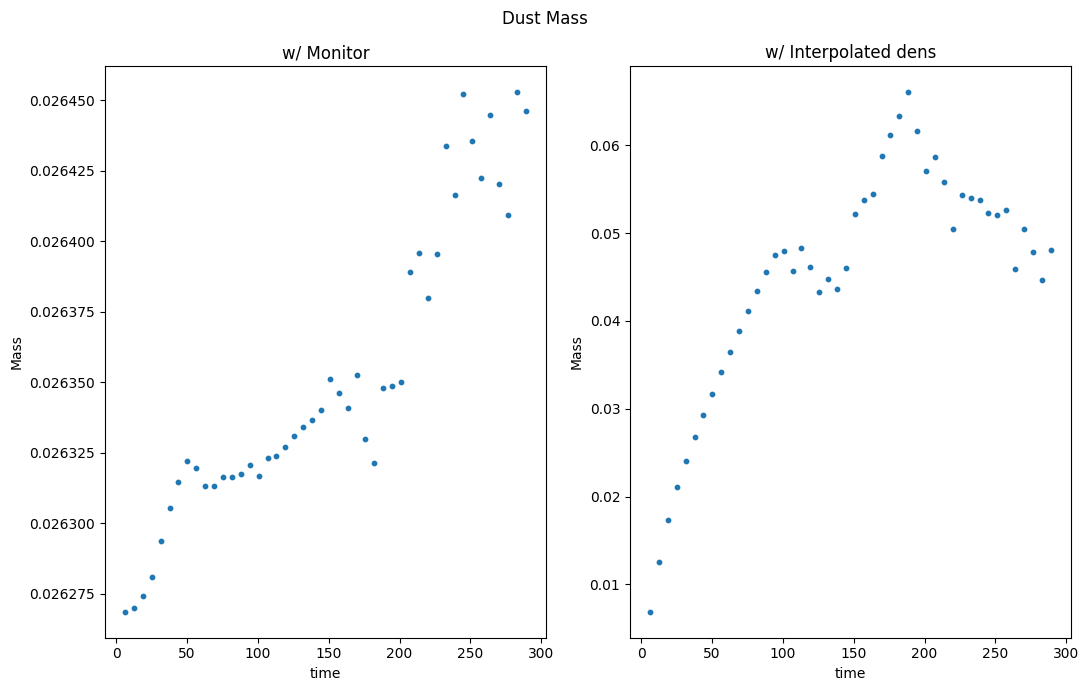

In [34]:
print('Dust difference: '+str((np.abs(mass_dust - mass_interp)/mass_dust)[:10])) 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 7))
fig.suptitle('Dust Mass')
# Primer gráfico
ax1.scatter(time_dust, mass_dust, s=10)       
ax1.set_title('w/ Monitor')
ax1.set_xlabel('time')
ax1.set_ylabel('Mass')

# Segundo gráfico
ax2.scatter(time_dust, mass_interp, s=10)
ax2.set_title('w/ Interpolated dens')
#ax2.set_ylim(0.04,0.05)
ax2.set_xlabel('time')
ax2.set_ylabel('Mass')

#print('Diferencia: '+str((np.abs(mass_interp - mass_dust)/mass_dens)[:10])) #diferencia
#plt.savefig('/home/fangulo/sim_hill_8/'+ fluid +'/monitor_interp_'+data_name+'.png')
print('/home/fangulo/sim_hill_8/'+ fluid +'/monitor_interp_'+data_name+'.png')

plt.tight_layout()
plt.show()

# VELOCITY GRAPH

/tmp/ipykernel_1329319/817941125.py:43: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh_gas1 = axs[0,0].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
/tmp/ipykernel_1329319/817941125.py:52: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh_gas2 = axs[0,1].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
/tmp/ipykernel_1329319/817941125.py:61: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply expli

/home/fangulo/plots/anim_sim_16hill_3q_vy.gif


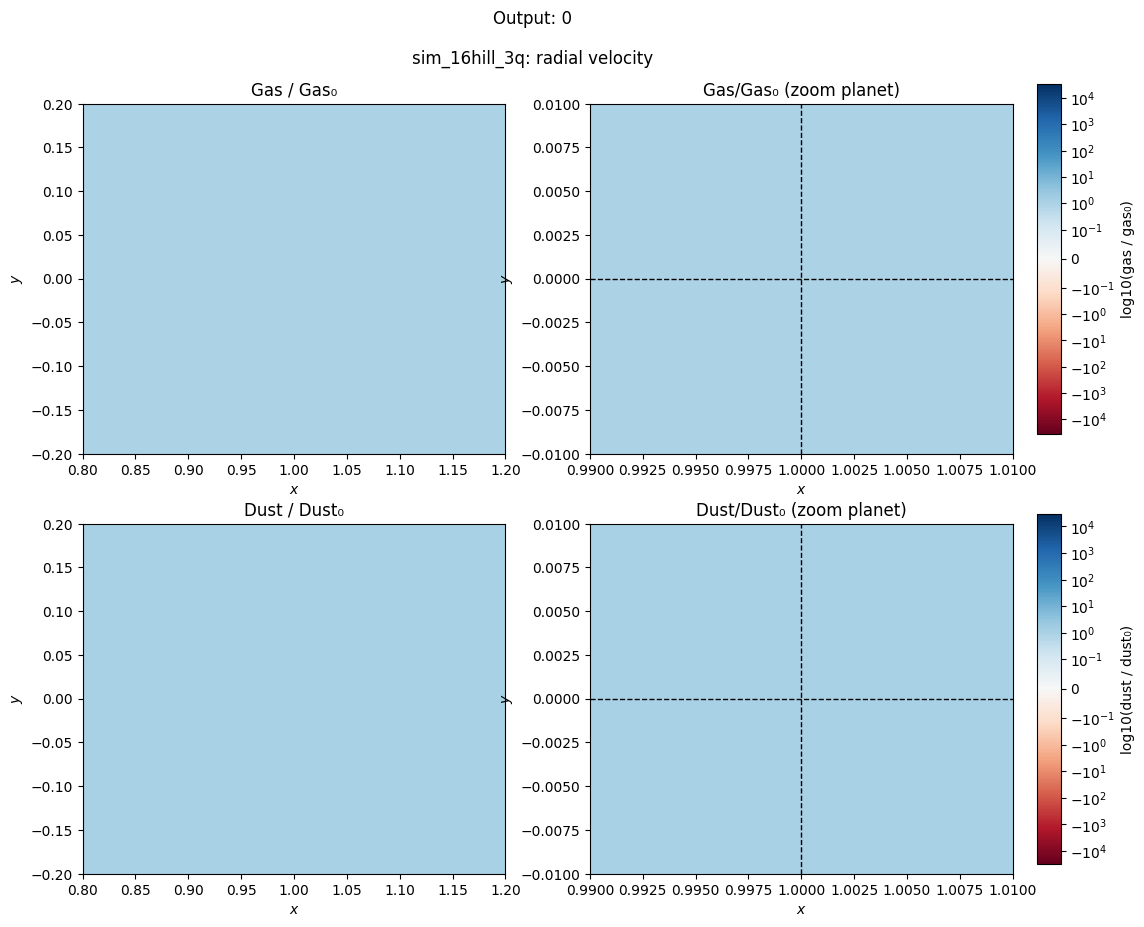

In [ ]:
# --- Archivos ---
archivos_gas = []
archivos_dust = []
for i in range(int(output_number)+1):
    archivos_gas.append(f"/home/fangulo/myforkfargo3d/fargo3d/outputs/{output_name}/gasvy{i}.dat")
    archivos_dust.append(f"/home/fangulo/myforkfargo3d/fargo3d/outputs/{output_name}/dustvy{i}.dat")

# --- Figura con 2x2 subplots ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# --- Datos iniciales (para normalizar) ---
data_gas0 = np.fromfile(archivos_gas[0]).reshape(ny, nx)
data_dust0 = np.fromfile(archivos_dust[0]).reshape(ny, nx)

# --- Calcular rango global (vmin/vmax) ---
vmax_gas = -np.inf
vmax_dust = -np.inf

for i in range(int(output_number)+1):
    data_gas = np.fromfile(archivos_gas[i]).reshape(ny, nx)
    data_dust = np.fromfile(archivos_dust[i]).reshape(ny, nx)

    ratio_gas = data_gas / data_gas0
    ratio_dust = data_dust / data_dust0

    vmax_gas = max(vmax_gas, ratio_gas.max())
    vmax_dust = max(vmax_dust, ratio_dust.max())

vmin_gas = -vmax_gas
vmin_dust = -vmax_dust #colorbar simétrica

# --- Definir normalización SymLogNorm ---
linthresh = 1e-1  # punto de quiebre (ajústalo según lo que quieras ver)
linscale = 1.0    # escala lineal (puedes probar con 2 o 3 para resaltar más)

norm_gas = mcolors.SymLogNorm(linthresh=linthresh, linscale=linscale,
                      vmin=vmin_gas, vmax=vmax_gas)
norm_dust = mcolors.SymLogNorm(linthresh=linthresh, linscale=linscale,
                       vmin=vmin_dust, vmax=vmax_dust)


# --- Inicializar las mallas (todo = 0 → log10(1)) ---
mesh_gas1 = axs[0,0].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
                                np.zeros_like(data_gas0), cmap='RdBu',
                                norm=norm_gas)
axs[0,0].set_xlim(1.0-0.2, 1+0.2)
axs[0,0].set_ylim(-0.2, 0.2)
axs[0,0].set_xlabel(r'$x$')
axs[0,0].set_ylabel(r'$y$')
axs[0,0].set_title('Gas / Gas₀')

mesh_gas2 = axs[0,1].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
                                np.zeros_like(data_gas0), cmap='RdBu',
                                norm=norm_gas)
axs[0,1].set_xlim(1.0-0.01, 1+0.01)
axs[0,1].set_ylim(-0.01, 0.01)
axs[0,1].set_xlabel(r'$x$')
axs[0,1].set_ylabel(r'$y$')
axs[0,1].set_title('Gas/Gas₀ (Hill radius)')

mesh_dust1 = axs[1,0].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
                                 np.zeros_like(data_dust0), cmap='RdBu',
                                 norm=norm_dust)
axs[1,0].set_xlim(1.0-0.2, 1+0.2)
axs[1,0].set_ylim(-0.2, 0.2)
axs[1,0].set_xlabel(r'$x$')
axs[1,0].set_ylabel(r'$y$')
axs[1,0].set_title('Dust / Dust₀')

mesh_dust2 = axs[1,1].pcolormesh(Y_MESH*np.cos(X_MESH), Y_MESH*np.sin(X_MESH),
                                 np.zeros_like(data_dust0), cmap='RdBu',
                                 norm=norm_dust)
axs[1,1].set_xlim(1.0-0.01, 1+0.01)
axs[1,1].set_ylim(-0.01, 0.01)
axs[1,1].set_xlabel(r'$x$')
axs[1,1].set_ylabel(r'$y$')
axs[1,1].set_title('Dust/Dust₀ (Hill radius)')

# --- Dibujar líneas en los paneles de zoom ---
for ax in [axs[0,1], axs[1,1]]:
    ax.axvline(x=1.0, color='black', linestyle='--', linewidth=1)
    ax.axhline(y=0.0, color='black', linestyle='--', linewidth=1)

# --- Colorbars ---
fig.subplots_adjust(right=0.90)

cbar_ax_gas = fig.add_axes([0.92, 0.55, 0.02, 0.35])
cbar_gas = fig.colorbar(mesh_gas1, cax=cbar_ax_gas)
cbar_gas.set_label('log10(gas / gas₀)')

cbar_ax_dust = fig.add_axes([0.92, 0.12, 0.02, 0.35])
cbar_dust = fig.colorbar(mesh_dust1, cax=cbar_ax_dust)
cbar_dust.set_label('log10(dust / dust₀)')

# --- Textos dinámicos ---
texto_tiempo = fig.text(0.5, 0.96, '', ha='center', fontsize=12)
texto_data = fig.text(0.5, 0.92, output_name+': radial velocity', ha='center', fontsize=12)

# --- Función de actualización ---
def actualizar(frame):
    # Cargar datos gas y polvo
    data_gas = np.fromfile(archivos_gas[frame]).reshape(ny, nx)
    data_dust = np.fromfile(archivos_dust[frame]).reshape(ny, nx)

    # Cociente con data inicial
    ratio_gas = data_gas / data_gas0
    ratio_dust = data_dust / data_dust0

    # Actualizar las 4 mallas
    mesh_gas1.set_array(ratio_gas.ravel())
    mesh_gas2.set_array(ratio_gas.ravel())
    mesh_dust1.set_array(ratio_dust.ravel())
    mesh_dust2.set_array(ratio_dust.ravel())

    texto_tiempo.set_text(f'Output: {frame}')
    return mesh_gas1, mesh_gas2, mesh_dust1, mesh_dust2, texto_tiempo

# --- Animación ---
ani = animation.FuncAnimation(fig, actualizar, frames=range(int(output_number)+1),
                              interval=200, blit=False)
writer = PillowWriter(fps=5, metadata={'loop': 0})

ani.save(f'/home/fangulo/plots/anim_{output_name}_vy.gif', writer=writer)
print(f'/home/fangulo/plots/anim_{output_name}_vy.gif')
